In [43]:
import pandas as pd

In [44]:
df_codis_info = pd.read_csv("data/codis_info.csv")

In [3]:
df_codis_info.tail()

,name,color1_ratio,color1_R,color1_G,color1_B,color2_ratio,color2_R,color2_G,color2_B,color3_ratio,color3_R,color3_G,color3_B
1111,397005,0.415858,234.213846,233.892050,238.172338,0.406404,21.023577,24.031536,28.714972,0.177737,62.144277,79.258053,111.384510
1112,397006,0.630105,23.764715,24.239371,24.751244,0.344838,242.026831,241.340823,245.811664,0.025057,125.453157,125.100815,126.039715
1113,397007,0.633673,27.650401,26.307009,27.053562,0.239583,75.057487,94.037051,129.622040,0.126744,206.097693,210.852559,216.266042
1114,397008,0.635646,33.647317,34.603687,35.937386,0.295892,198.603922,7.386471,13.563333,0.068461,233.768644,231.126271,231.515254
1115,397009,0.873307,28.293539,29.345128,33.002562,0.095912,240.303279,240.676545,241.539723,0.030781,102.096267,103.807466,105.422397


### Naive Bayes (Good / Bad)

In [4]:
ar_codis_RGB = df_codis_info.filter(regex="[RGB]").values

In [5]:
ar_codis_RGB.shape

(1116, 9)

In [6]:
ar_codis_RGB

array([[  19.32861825,   74.59376488,  101.89400857, ...,  225.54908553,
         231.38313609,  234.0563475 ],
       [ 235.85371309,  237.4992544 ,  243.46704444, ...,  111.74219517,
         129.04810524,  134.95169841],
       [  29.89821134,   32.72546482,   34.27888915, ...,  242.45129398,
         243.41465542,  245.62925269],
       ..., 
       [  27.65040064,   26.30700931,   27.05356241, ...,  206.09769286,
         210.85255948,  216.26604182],
       [  33.64731654,   34.60368748,   35.93738591, ...,  233.76864407,
         231.12627119,  231.51525424],
       [  28.29615012,   29.34766653,   33.0050547 , ...,  102.16732283,
         103.88188976,  105.49409449]])

##### 가짜 데이터 생성 (0~ 255)

In [5]:
import random

In [6]:
for _ in range(1116):
    fake_data = np.array([[random.randint(0, 256) for _ in range(0, 9)]])
    ar_codis_RGB = np.vstack([ar_codis_RGB, fake_data])

In [7]:
X = ar_codis_RGB

In [8]:
# target
ar_good = np.ones(1116)
ar_bad = np.zeros(1116)

In [9]:
y = np.concatenate([ar_good, ar_bad])

In [62]:
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

### MultinomialNB

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
mnb = MultinomialNB()

In [14]:
mnb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

##### 성능 확인

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

In [16]:
y_pred = mnb.predict(X)

In [17]:
confusion_matrix(y, y_pred)

array([[660, 456],
       [486, 630]], dtype=int64)

### QDA

In [11]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [12]:
qda = QuadraticDiscriminantAnalysis()

In [17]:
qda.fit(X, y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

##### 성능확인

In [18]:
y_pred = qda.predict(X)

In [60]:
confusion_matrix(y, y_pred)

array([[1110,    6],
       [  71, 1045]], dtype=int64)

In [61]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.97      1116
        1.0       0.99      0.94      0.96      1116

avg / total       0.97      0.97      0.97      2232



##### cross_valadation

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(qda, X, y, cv=5).mean()

0.96549287315823185

##### ROC curve

In [23]:
qda.decision_function(X)

array([   6.6842103 ,    8.45306465,   12.83352645, ...,  -85.9512555 ,
       -104.76832775, -122.92930814])

In [24]:
fpr, tpr, thresholds = roc_curve(y, qda.decision_function(X))

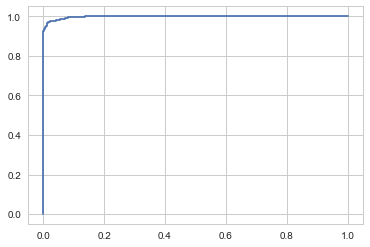

In [25]:
plt.plot(fpr, tpr)

### Save model

In [26]:
import pickle

In [27]:
with open("qda_goodbad.p", "wb") as f:
    pickle.dump(qda, f)

In [32]:
with open("qda_goodbad.p", "rb") as f:
    qda = pickle.load(f)

In [ ]:
qda.pred_prob(X)

In [28]:
X[0].reshape(1, 9)

array([[  19.34748397,   74.59897511,  101.8978186 ,  118.26381536,
         136.83769852,  161.96238507,  225.59596231,  231.41857335,
         234.08371467]])

In [4]:
color1= np.array([19.32861825,   74.59376488,  101.89400857])
color2=np.array([118.23544433, 136.80332436,  161.93016993])
color3=np.array([225.54908553,  231.38313609, 234.0563475])

In [30]:
np.hstack([color1, color2, color3])

array([  19.32861825,   74.59376488,  101.89400857,  118.23544433,
        136.80332436,  161.93016993,  225.54908553,  231.38313609,
        234.0563475 ])

In [40]:
qda.predict_proba(X[0].reshape(1, 9))

array([ 1.])

In [34]:
y_pred

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [1]:
import pickle
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [13]:
def qda_goodbad(color1, color2, color3):
    '''
    Predict Good/Bad codis using qda
    input :  color1(RGB), color2(RGB), color3(RGB)
    output : good probabilities
    '''
    
    # load model
    with open("model/qda_goodbad.p", "rb") as f:
        qda = pickle.load(f)
    
    # change color
    color1 = np.array(color1)
    color2 = np.array(color2)
    color3 = np.array(color3)
    color = np.hstack([color1, color2, color3])
    
    # predict
    prob_good = qda.predict_proba(color.reshape(1, 9))[0]
    
    return prob_good[1]

In [14]:
color1= np.array([19.32861825,   74.59376488,  101.89400857])
color2=np.array([118.23544433, 136.80332436,  161.93016993])
color3=np.array([225.54908553,  231.38313609, 234.0563475])

In [15]:
qda_goodbad(color1, color2, color3)

0.9987228069348237

In [59]:
for i in range(1116):
    a = df_codis_info.iloc[i].filter(regex = "color1_[RGB]").values
    b = df_codis_info.iloc[i].filter(regex = "color2_[RGB]").values
    c = df_codis_info.iloc[i].filter(regex = "color3_[RGB]").values
    
    print(qda_goodbad(a,b,c))
    

0.99875105992
0.999786799575
0.999997330259
0.999941156303
0.127225048269
0.988662241193
0.999790132352
0.999999521572
0.99998802657
0.999909865534
0.999981069158
0.999913523252
0.999983239972
0.999998278741
0.995813576034
0.999992695685
0.999883171578
0.99999542559
0.999962794493
0.0118745279277
0.99999694697
0.99998695861
0.999998417128
0.999976050902
0.999687544358
0.999877587943
0.999996294453
0.999978907896
0.993428887574
0.999993652899
0.999924903265
0.99999692714
0.999112440755
0.999996267197
0.99999479912
0.999996886799
0.999995652154
0.999990141477
0.999555548563
0.99999586098
0.99998601238
0.999065160838
0.999943870657
0.999992156134
0.99999725116
0.999415566645
0.999855444263
0.999789047502
0.999937744982
0.0120568488284
0.999996367943
0.999994399914
0.000398920778063
0.999995673076
0.999936172121
0.99962910844
0.99998886698
0.999977619823
0.999990733168
0.99991624833
0.999994796492
0.999996937308
0.999991225106
0.999996234162
0.999996154917
0.999997446852
0.999996615801
0.9

0.424345000911
0.0243028186617
0.997808373668
0.985746214601
0.999997871983
0.999996919767
0.999982392462
0.999997338411
0.999904185251
0.999982721498
0.999976721549
0.999936922243
0.999993368158
0.99999434037
0.999975511198
0.999998534065
0.999882727965
0.997922039517
0.999995948856
0.999923928037
0.967509754363
0.999998403242
0.0178180501036
0.999998648806
0.999995518545
0.999986050961
0.999947632809
0.999945241691
0.999984894055
0.999979942415
0.999969399121
0.999995148065
0.997623616336
0.998680512051
0.999927590884
0.999986550141
0.999987810836
0.999997117173
0.999799367948
0.0291279182381
0.999994070675
0.999986499933
0.999997469086
0.999974998429
0.999987910267
0.999852995981
0.967049204221
0.999997655523
0.999993618874
0.999998121935
0.999953407558
0.999997739023
0.999988694504
0.999997872863
0.999998090156
0.999990027837
0.999994100901
0.999989170994
0.999995800344
0.999582028966
0.999723617029
0.999962131333
0.999988154558
0.999992349917
6.77328280183e-09
0.999820615791
0.999

In [38]:
color1 = [35, 36, 38]
color2 = [27,126, 109]
color3 = [209, 207, 201]

In [58]:
df_codis_info.iloc[0].filter(regex = "color1_[RGB]").values

array([  19.34748397,   74.59897511,  101.8978186 ])

In [55]:
a = df_codis_info[df_codis_info["name"] == 396610].filter(regex = "color1_[RGB]").values
b = df_codis_info[df_codis_info["name"] == 396610].filter(regex = "color2_[RGB]").values`
c = df_codis_info[df_codis_info["name"] == 396610].filter(regex = "color3_[RGB]").values

In [56]:
qda_goodbad(a,b,c)

0.043497449524367175